In [1]:
import subprocess as sp
import sys,os,shutil,pickle,time
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cars_cleaned.csv')
df.head(5)

,Price,Year,Mileage,Make,Model
0,8995,2014,35725,Acura,ILX6-Speed
1,10888,2013,19606,Acura,ILX5-Speed
2,8995,2013,48851,Acura,ILX6-Speed
3,10999,2014,39922,Acura,ILX5-Speed
4,14799,2016,22142,Acura,ILXAutomatic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831472 entries, 0 to 831471
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    831472 non-null  int64 
 1   Year     831472 non-null  int64 
 2   Mileage  831472 non-null  int64 
 3   Make     831472 non-null  object
 4   Model    831472 non-null  object
dtypes: int64(3), object(2)
memory usage: 31.7+ MB


In [4]:
#Label Processing
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

df[['Make', 'Model']] = df[['Make', 'Model']].apply(le.fit_transform)
#df['city'] = le.fit(df['city'])

In [5]:
#Split Train and Test Data
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
y= df.Price
X= df.drop('Price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

#Standard Scalar: It assumes that data is normally distributed within each feature. This is not appropriate for this data

(665177, 4) (665177,)
(166295, 4) (166295,)


In [6]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [7]:
#Min-max scaler:For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then 
#divides by the range. The range is the difference between the original maximum and original minimum.

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [9]:
X_train

array([[0.64705882, 0.19986131, 0.70909091, 0.96305031],
       [0.94117647, 0.04430195, 0.16363636, 0.25353774],
       [0.64705882, 0.62606157, 0.94545455, 0.86595912],
       ...,
       [0.52941176, 0.4537131 , 0.16363636, 0.22287736],
       [0.64705882, 0.40191861, 0.70909091, 0.09394654],
       [0.82352941, 0.20996191, 0.16363636, 0.24842767]])

In [10]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [11]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [12]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2518.8
Mean Squared Error: 17640231.25
Root Mean Squared Error: 4200.03


In [13]:
#Let's increase number of tress from 20 to 200
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [14]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2486.92
Mean Squared Error: 17210282.85
Root Mean Squared Error: 4148.53


In [15]:
# Visualizing a Single Decision Tree

# Import tools needed for visualization
rf= regressor
features= df.drop('Price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [16]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 's_tree.dot',
                feature_names = feature_list, rounded = True, precision = 1, proportion = False, filled= True)

(graph, ) = pydot.graph_from_dot_file('s_tree.dot')
graph.write_png('s_tree.png');

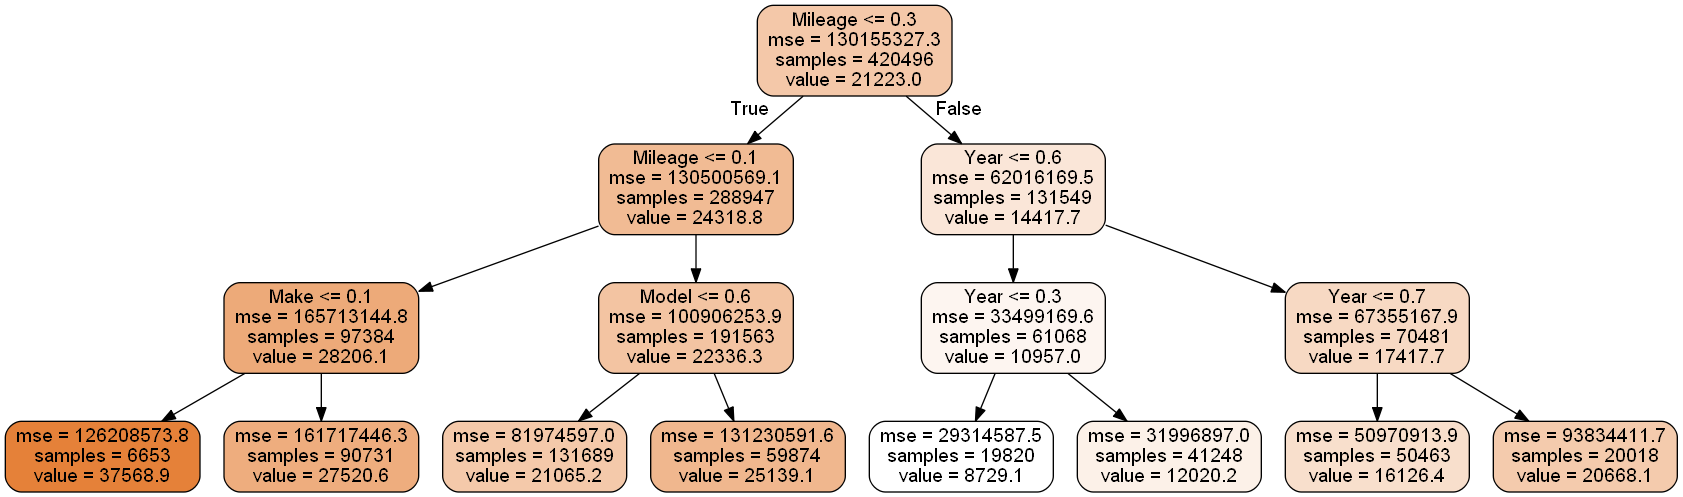

In [17]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 's_tree.png')

In [22]:
#Ridge Regression
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

#First Linear regression will be applied

In [23]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mse(y_test, y_pred_lr))
rr = Ridge()
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
rmse_rr = np.sqrt(mse(y_test, y_pred_rr))
print('-------------Linear Regression-------------')
print("RMSE = {:.2f}".format((rmse_lr)))
accuracy = lr.score(X_test,y_test)
print('Accuracy = ', accuracy*100,'%')
print('-------------Ridge Regression--------------')
print("RMSE = {:.2f}".format((rmse_rr)))

-------------Linear Regression-------------
RMSE = 9836.34
Accuracy =  26.269195506372157 %
-------------Ridge Regression--------------
RMSE = 9836.34


In [24]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

16614.274646394624
[ 12646.11671101 -19159.1152648   -3939.48764828   4358.60537516]


In [25]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Year,12646.116711
Mileage,-19159.115265
Make,-3939.487648
Model,4358.605375


In [26]:
OLS_pred= regressor.predict(X_train)

In [27]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_train, OLS_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_train, OLS_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_train, OLS_pred)),2))

Mean Absolute Error: 7270.14
Mean Squared Error: 95944447.31
Root Mean Squared Error: 9795.12


In [28]:
#Check performance of OLS on test data

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
round(df1,2)

,Actual,Predicted
161700,37995,27393.49
34449,7950,4633.46
437169,4950,8753.29
190968,27989,27395.99
371103,11350,21776.58
536633,14995,16743.58
332211,28989,16998.41
385474,14995,19657.54
569523,14000,26743.84
446506,24800,29975.12


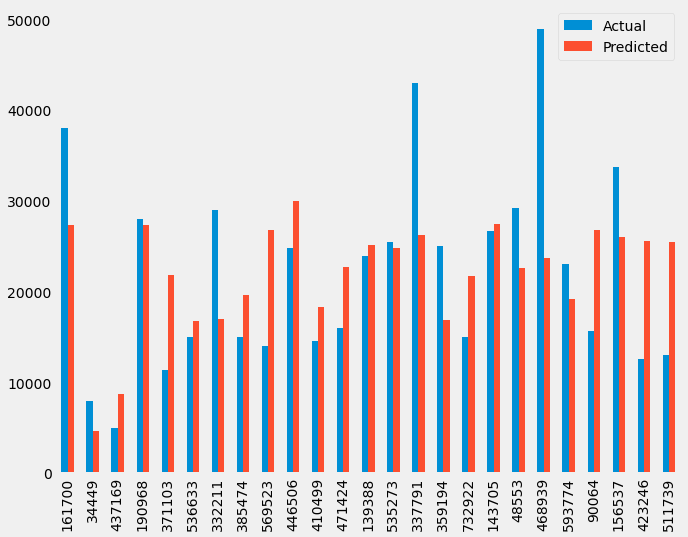

In [31]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [32]:
#Evaluate OLS prediciton on test data

In [33]:
y_pred = regressor.predict(X_test)

In [34]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 7284.09
Mean Squared Error: 96753506.79
Root Mean Squared Error: 9836.34


In [35]:
#Ridge Regression
alphas = 10**np.linspace(10,-2,100)*0.5

Text(0, 0.5, 'weights')

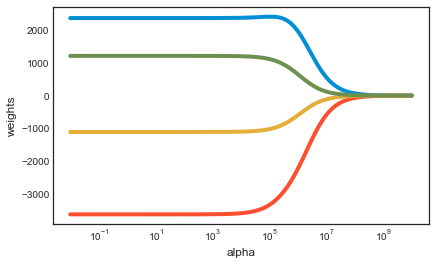

In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn.preprocessing import scale 

%matplotlib inline
plt.style.use('seaborn-white')

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf= Ridge()
coefs = []

for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(scale(X_train), y_train)
    coefs.append(clf.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [37]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.005

In [38]:
#Finally, we refit our ridge regression model on the full data set, using the value of alpha chosen by cross-validation,
#and examine the coefficient estimates.


In [39]:
# Fit a ridge regression on the training data
pred2 = ridgecv.predict(X_test)
# Use this model to predict the test data
print(pd.Series(ridgecv.coef_, index = X.columns))

Year       12677.829287
Mileage   -19036.981024
Make       -3917.167563
Model       4333.281752
dtype: float64


In [40]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred2),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred2),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred2)),2))

Mean Absolute Error: 7283.58
Mean Squared Error: 96753069.21
Root Mean Squared Error: 9836.31


Text(0.5, 1.0, 'Feature importance using Ridge Model')

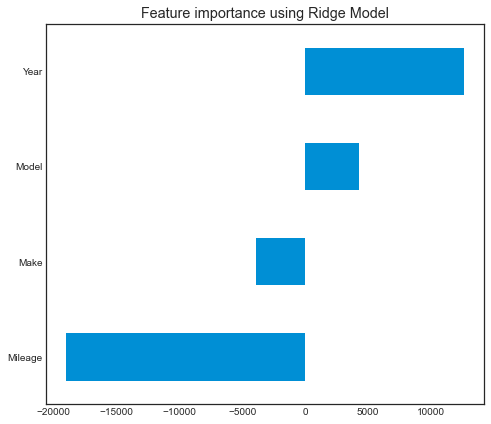

In [41]:
coef_ridge= pd.Series(ridgecv.coef_, index = X.columns)
imp_coef = coef_ridge.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (7.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

In [42]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

In [43]:
rmse_val2 = [] #to store rmse values for different k
for K in range(15):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5428.548074794474
RMSE value for k=  2 is: 4818.396113199105
RMSE value for k=  3 is: 4644.681147498189
RMSE value for k=  4 is: 4568.331188382375
RMSE value for k=  5 is: 4544.257823390391
RMSE value for k=  6 is: 4536.388717414375
RMSE value for k=  7 is: 4534.0089665609385
RMSE value for k=  8 is: 4542.036013423712
RMSE value for k=  9 is: 4558.089587264187
RMSE value for k=  10 is: 4568.231510873747
RMSE value for k=  11 is: 4586.547284621922
RMSE value for k=  12 is: 4608.144179908468
RMSE value for k=  13 is: 4627.261728998968
RMSE value for k=  14 is: 4646.837707557457
RMSE value for k=  15 is: 4668.714102974919


<AxesSubplot:>

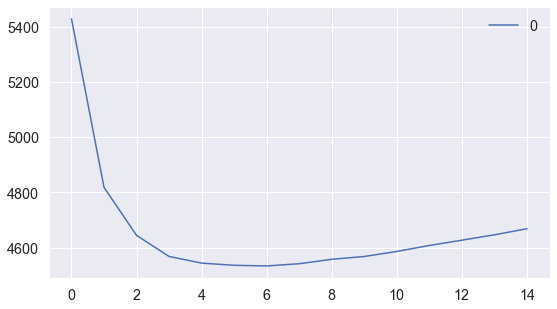

In [44]:
#plotting the rmse values against k values
import seaborn as sns

sns.set(font_scale=1.3)

curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot(figsize=(8,5))

In [45]:
#This means that we can make the best prediction by looking at two to six nearest neighbors of a data point. 
#The number depends on the insight of the researcher.
#Generating Model for K=6

In [46]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [47]:
#Model evaluation

In [48]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.019970534291469978


In [49]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
accuracy = knn.score(X_test,y_test)
print("Accuracy:", round(accuracy*100,2),'%')

Mean Absolute Error: 4035.65
Mean Squared Error: 41405533.47
Root Mean Squared Error: 6434.71
Accuracy: 2.0 %
